# Factors Driving Perceived Value in Apparel

In this project, we analyze the factors driving the perceived value of apparel items and identify ways for brands to enhance pricing strategies without losing customers.

The questiion to research is **"What factors drive the perceived value of an apparel item, and how can brands adjust their pricing strategies to enhance value without losing costumers?"**

## Objective
- Understand the drivers of perceived value in apparel.
- Develop actionable recommendations for pricing strategies.

## Data Sources
- Amazon Product Reviews Dataset
- Luxury Fashion Sales and Customer Reviews Dataset

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

### Data Exploration

In [4]:
clothing_reviews=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
clothing_reviews.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
vestiaire_data = pd.read_csv('vestiaire.csv')
vestiaire_data.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,Tourcoing,25775970,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Tourcoing,13698770,olivia13698770,NaN,Belgium,0.0,0.0,0.0,8.0,0.0
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,Tourcoing,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,96.0
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,...,Brooklyn,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,96.0
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,...,Crawley,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,89.0


#### Data Cleaning

In [6]:
# Check for missing values in the Clothing Reviews dataset
clothing_reviews.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [7]:
clothing_reviews = clothing_reviews.dropna(subset=['Review Text'])

In [8]:
clothing_reviews['Title'] = clothing_reviews['Title'].fillna('Unknown')

In [9]:
clothing_reviews.isnull().sum()

Unnamed: 0                  0
Clothing ID                 0
Age                         0
Title                       0
Review Text                 0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name              13
Department Name            13
Class Name                 13
dtype: int64

In [10]:
# Drop rows with missing Division Name, Department Name, or Class Name
clothing_reviews = clothing_reviews.dropna(subset=['Division Name', 'Department Name', 'Class Name'])

In [11]:
clothing_reviews.isnull().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [12]:
# Check for missing values in the Vestiaire dataset
vestiaire_data.isnull().sum()

product_id                         0
product_type                       0
product_name                       0
product_description                7
product_keywords                1183
product_gender_target              0
product_category                1183
product_season                     2
product_condition                  0
product_like_count                 0
sold                               0
reserved                           0
available                          0
in_stock                           0
should_be_gone                     0
brand_id                           0
brand_name                         0
brand_url                          0
product_material                   4
product_color                      1
price_usd                          0
seller_price                       0
seller_earning                     0
seller_badge                       0
has_cross_border_fees          13736
buyers_fees                    13736
warehouse_name                     0
s

In [13]:
# Drop rows with missing product descriptions or categories
vestiaire_data = vestiaire_data.dropna(subset=['product_description', 'product_category', 'product_keywords'])

In [14]:
# Fill missing values with "Unknown"
vestiaire_data['product_season'] = vestiaire_data['product_season'].fillna('Unknown')
vestiaire_data['product_material'] = vestiaire_data['product_material'].fillna('Unknown')
vestiaire_data['product_color'] = vestiaire_data['product_color'].fillna('Unknown')

In [15]:
# Drop columns with excessive missing values
vestiaire_data = vestiaire_data.drop(columns=['has_cross_border_fees', 'buyers_fees', 'usually_ships_within'])

In [16]:
vestiaire_data.isnull().sum()

product_id                     0
product_type                   0
product_name                   0
product_description            0
product_keywords               0
product_gender_target          0
product_category               0
product_season                 0
product_condition              0
product_like_count             0
sold                           0
reserved                       0
available                      0
in_stock                       0
should_be_gone                 0
brand_id                       0
brand_name                     0
brand_url                      0
product_material               0
product_color                  0
price_usd                      0
seller_price                   0
seller_earning                 0
seller_badge                   0
warehouse_name                 0
seller_id                      0
seller_username               39
seller_country                 0
seller_products_sold           0
seller_num_products_listed     0
seller_com

In [17]:
vestiaire_data['seller_username'] = vestiaire_data['seller_username'].fillna('Unknown')

In [18]:
# Check for duplicates in Clothing Reviews
clothing_reviews.duplicated().sum()

0

In [19]:
# Check for duplicates in Vestiaire
vestiaire_data.duplicated().sum()

0

#### Summary statistics 

In [20]:
clothing_reviews.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000
mean,11737.272097,919.695908,43.282880,4.183092,0.818764,2.631784
std,6781.574232,201.683804,12.328176,1.115911,0.385222,5.787520
min,0.000000,1.000000,18.000000,1.000000,0.000000,0.000000
25%,5868.750000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11727.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17617.250000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [21]:
vestiaire_data.describe()

,product_id,product_like_count,brand_id,price_usd,seller_price,seller_earning,seller_id,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
count,8.993240e+05,899324.000000,899324.000000,899324.000000,899324.000000,899324.000000,8.993240e+05,899324.000000,899324.000000,8.993240e+05,8.993240e+05,899324.000000
mean,3.809973e+07,6.302583,2431.964740,387.154217,331.891598,290.662301,1.382175e+07,665.304206,1498.944663,5.625620e+04,9.917086e+03,72.458124
std,7.750058e+06,12.926829,3699.229015,1860.763270,1592.503081,1499.129475,7.535837e+06,3554.409604,5463.361554,1.438488e+05,3.559837e+05,34.429097
min,1.113630e+05,0.000000,2.000000,6.130000,5.110000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,-180.000000
25%,3.811442e+07,1.000000,66.000000,83.070000,71.360000,58.580000,7.976512e+06,6.000000,10.000000,0.000000e+00,1.700000e+01,68.000000
50%,4.174231e+07,3.000000,341.000000,168.700000,143.780000,125.760000,1.438405e+07,34.000000,52.000000,0.000000e+00,7.300000e+01,88.000000
75%,4.267788e+07,7.000000,3266.000000,350.690000,298.200000,261.990000,1.946183e+07,178.000000,373.000000,2.540600e+04,2.900000e+02,95.000000
max,4.324884e+07,3154.000000,18237.000000,632610.000000,527175.000000,509229.750000,2.608177e+07,79738.000000,39628.000000,1.064736e+06,1.417912e+07,100.000000


In [22]:
# Unique values in categorical columns (Clothing Reviews)
clothing_reviews['Division Name'].value_counts()
clothing_reviews['Department Name'].value_counts()

Department Name
Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: count, dtype: int64

In [23]:
# Unique values in categorical columns (Vestiaire)
vestiaire_data['product_category'].value_counts()
vestiaire_data['product_condition'].value_counts()

product_condition
Very good condition     400597
Never worn              221136
Good condition          130291
Never worn, with tag    122924
Fair condition           24376
Name: count, dtype: int64

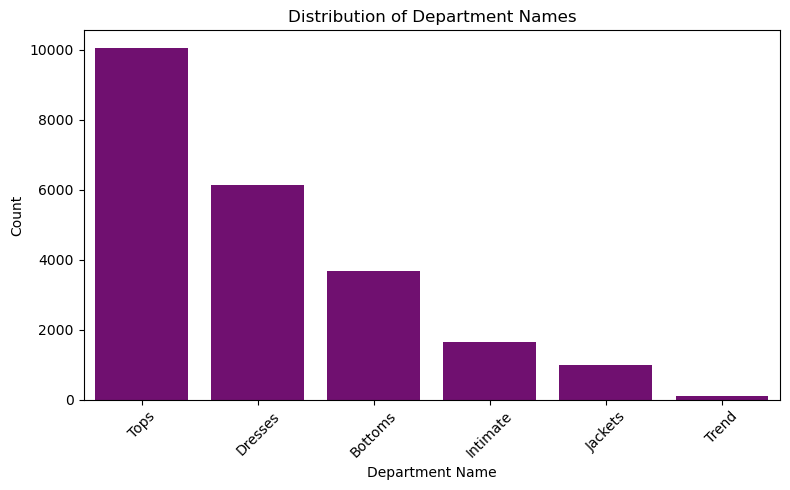

In [34]:
# Bar plot for Clothing Reviews: Department Name
plt.figure(figsize=(8, 5))
sns.countplot(data=clothing_reviews, x='Department Name', order=clothing_reviews['Department Name'].value_counts().index, color='purple')
plt.title('Distribution of Department Names')
plt.xlabel('Department Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

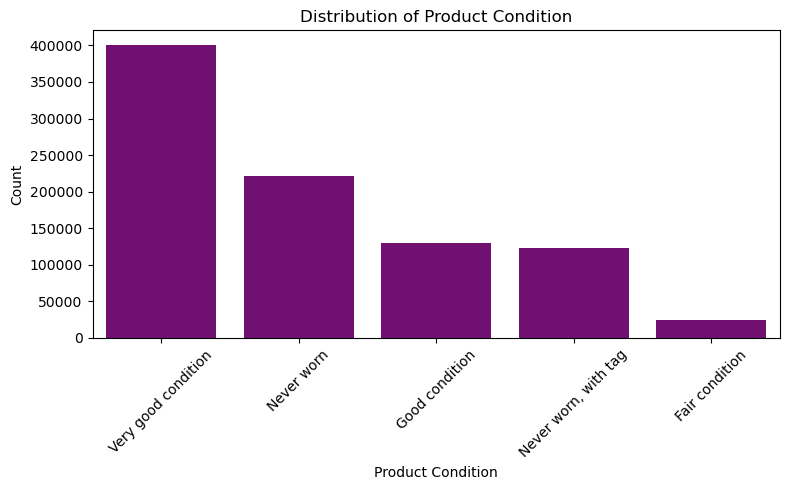

In [33]:
# Bar plot for Vestiaire: Product Condition
plt.figure(figsize=(8, 5))
sns.countplot(data=vestiaire_data, x='product_condition', order=vestiaire_data['product_condition'].value_counts().index, color='purple')
plt.title('Distribution of Product Condition')
plt.xlabel('Product Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Numerical Features

In [29]:
# Summary statistics for numerical features in Vestiaire
vestiaire_data[['price_usd', 'seller_price', 'product_like_count']].describe()

,price_usd,seller_price,product_like_count
count,899324.000000,899324.000000,899324.000000
mean,387.154217,331.891598,6.302583
std,1860.763270,1592.503081,12.926829
min,6.130000,5.110000,0.000000
25%,83.070000,71.360000,1.000000
50%,168.700000,143.780000,3.000000
75%,350.690000,298.200000,7.000000
max,632610.000000,527175.000000,3154.000000


In [31]:
# Check quantiles to find meaningful x-axis limits
vestiaire_data['price_usd'].quantile([0.25, 0.5, 0.75, 0.95, 0.99])

0.25      83.07
0.50     168.70
0.75     350.69
0.95    1056.00
0.99    3741.22
Name: price_usd, dtype: float64

- 75% of the prices are below $350.69.
  
- 95% of the prices are below $1,056.00, which suggests the vast majority of items fall within this range.
  
- The 99th percentile is $3,741.22, confirming that a very small portion of items are significantly more expensive

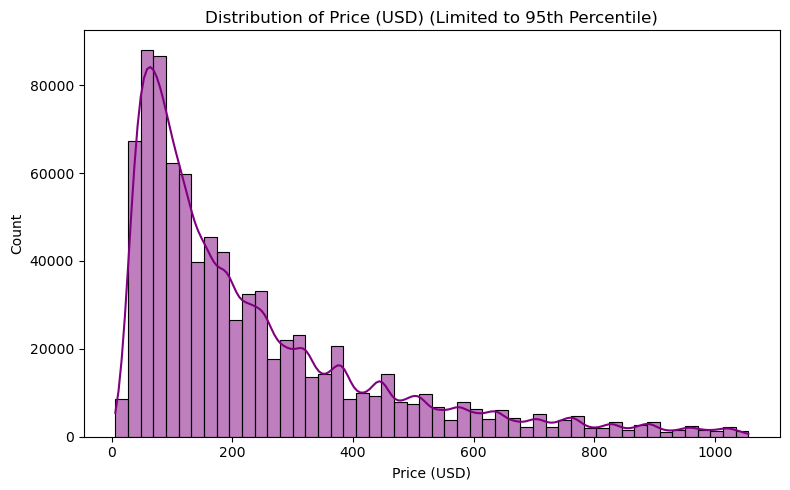

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(vestiaire_data[vestiaire_data['price_usd'] < 1056]['price_usd'], bins=50, kde=True, color='purple')
plt.title('Distribution of Price (USD) (Limited to 95th Percentile)')
plt.xlabel('Price (USD)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The price distribution is right-skewed, with the majority of items priced below 400, having items priced above $800 far less common.

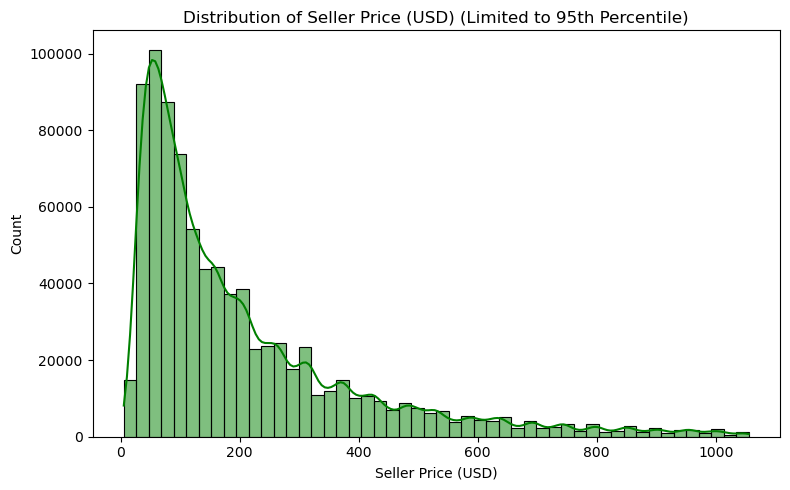

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(vestiaire_data[vestiaire_data['seller_price'] < 1056]['seller_price'], bins=50, kde=True, color='green')
plt.title('Distribution of Seller Price (USD) (Limited to 95th Percentile)')
plt.xlabel('Seller Price (USD)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Most items are priced below $200, and the frequency decreases steadily for higher price points.

The majority of sellers price their items within an affordable or mid-range bracket.
This suggests that sellers are pricing items competitively in the secondhand market.

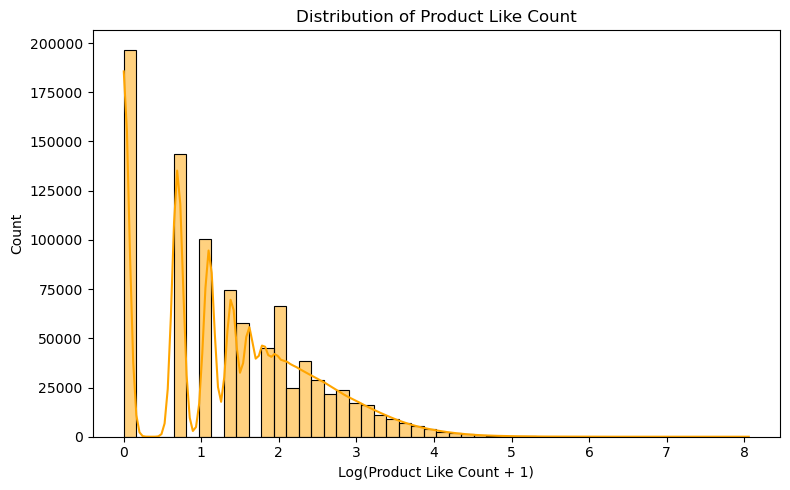

In [36]:
# log transformation
vestiaire_data['log_product_like_count'] = np.log1p(vestiaire_data['product_like_count'])  # log1p handles log(0)

# Plot distribution
plt.figure(figsize=(8, 5))
sns.histplot(vestiaire_data['log_product_like_count'], bins=50, kde=True, color='orange')
plt.title('Distribution of Product Like Count')
plt.xlabel('Log(Product Like Count + 1)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The transformation reveals a more balanced view of how products are liked, helping to mitigate the skew caused by extreme outliers. Product like count can be a valuable feature for predicting product desirability or sales, as it captures a wide range of popularity while reducing the influence of outliers.

In [37]:
# Summary statistics for numerical features in Clothing Reviews
clothing_reviews[['Age', 'Rating', 'Positive Feedback Count']].describe()

,Age,Rating,Positive Feedback Count
count,22628.000000,22628.000000,22628.000000
mean,43.282880,4.183092,2.631784
std,12.328176,1.115911,5.787520
min,18.000000,1.000000,0.000000
25%,34.000000,4.000000,0.000000
50%,41.000000,5.000000,1.000000
75%,52.000000,5.000000,3.000000
max,99.000000,5.000000,122.000000


- Most reviewers are between 34 (25th percentile) and 52 (75th percentile), indicating a fairly middle-aged audience.
- The minimum rating is 1, indicating some dissatisfaction, but low ratings are likely rare.
- Most products have very few positive feedbacks (median = 1), but some items are significantly more popular (as seen from the max = 122).

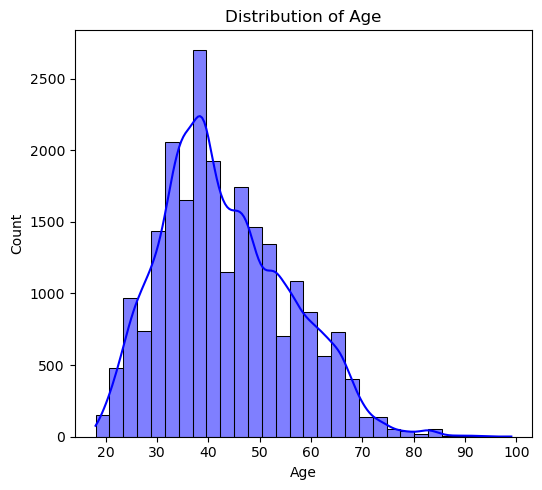

In [38]:
# Plot histograms for numerical features in Clothing Reviews
plt.figure(figsize=(15, 5))

# Age Distribution
plt.subplot(1, 3, 1)
sns.histplot(clothing_reviews['Age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The highest peak occurs around 30 years, making this the most common reviewer age.
There is a gradual decline in counts from 40 to 50 years, showing a significant secondary audience.
The dataset primarily represents young to middle-aged adults, with younger individuals being the largest group. This is crucial when analyzing preferences or behaviors tied to age, as these two groups may have different priorities.

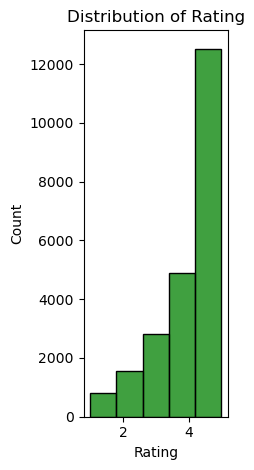

In [39]:
# Rating Distribution
plt.subplot(1, 3, 2)
sns.histplot(clothing_reviews['Rating'], bins=5, kde=False, color='green')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The largest peak is at 5 stars, showing that the majority of products received excellent ratings.
The data shows a positive sentiment bias in customer reviews, which is typical for product reviews where satisfied customers are more likely to leave feedback

In [40]:
clothing_reviews['log_positive_feedback'] = np.log1p(clothing_reviews['Positive Feedback Count'])

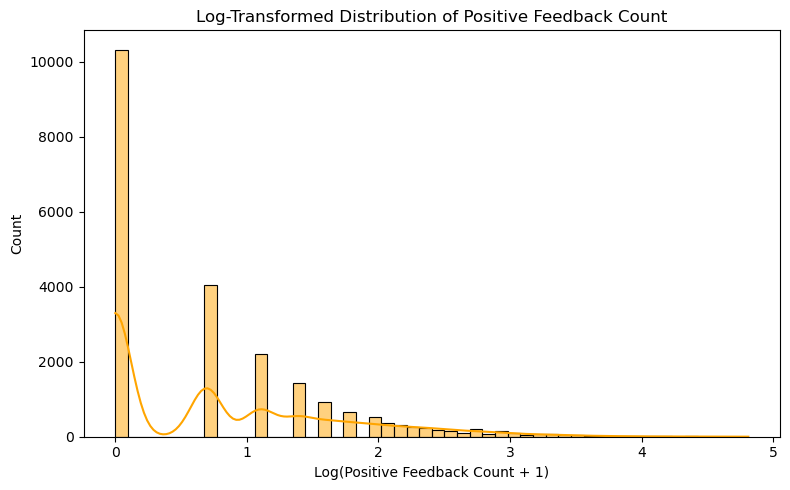

In [41]:
# Positive Feedback Count Distribution
plt.figure(figsize=(8, 5))
sns.histplot(clothing_reviews['log_positive_feedback'], bins=50, kde=True, color='orange')
plt.title('Log-Transformed Distribution of Positive Feedback Count')
plt.xlabel('Log(Positive Feedback Count + 1)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

##### Log-Transformed Distribution of Positive Feedback Count
1. **Improved Spread**: The log transformation compresses outliers, making the data easier to interpret.
2. **Majority Cluster**: Most products still receive minimal positive feedback (log(1) ≈ 0), consistent with the original data.
3. **Clearer Insights**: The log-transformed data reveals a smoother tapering and better distribution of feedback among products with higher counts.
4. **Modeling Benefits**: This transformation reduces the impact of outliers and creates a more balanced feature for predictive modeling.
iers.

## Sentiment Analysis

In [42]:
!pip install textblob

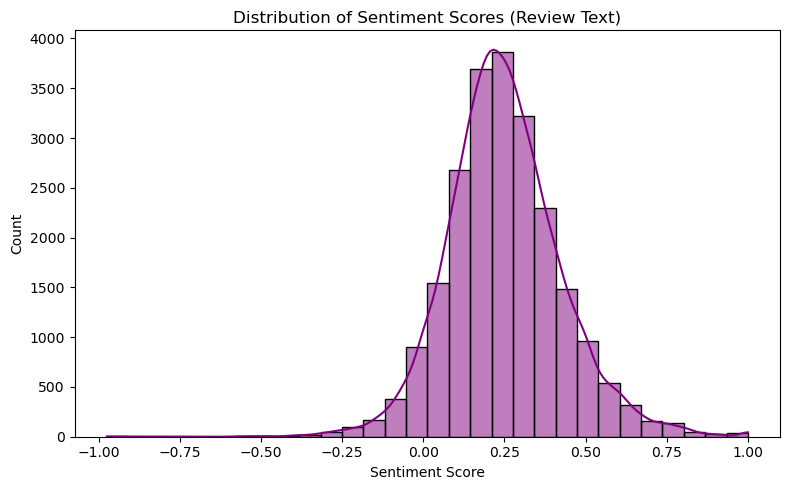

In [43]:
from textblob import TextBlob

# Define a function to calculate sentiment polarity
def calculate_sentiment(text):
    if pd.isnull(text):  # Handle missing text
        return 0
    return TextBlob(text).sentiment.polarity  # Polarity ranges from -1 (negative) to +1 (positive)

# Apply sentiment analysis to Review Text
clothing_reviews['sentiment_score'] = clothing_reviews['Review Text'].apply(calculate_sentiment)

# Plot the sentiment distribution
plt.figure(figsize=(8, 5))
sns.histplot(clothing_reviews['sentiment_score'], bins=30, kde=True, color='purple')
plt.title('Distribution of Sentiment Scores (Review Text)')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Range**:
   - Scores range from **-1 (negative)** to **1 (positive)**, but the majority of reviews fall between **0 and 0.5**, showing a mostly positive tone.
     
**Peaks**:
   - The highest peak is around **0.25**, suggesting that most reviews are moderately positive.
     
**Outliers**:
   - Strongly negative or strongly positive reviews are rare, but they may provide insights into extreme customer opinions.

###### Insights for Modeling:
- Sentiment scores directly capture the emotional tone of customer reviews, making them a valuable feature for predictive modeling.

#### Keyword Extraction

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=20, stop_words='english')

# Fit and transform the review text
tfidf_matrix = tfidf.fit_transform(clothing_reviews['Review Text'].fillna(''))

# Get the feature names (keywords)
keywords = tfidf.get_feature_names_out()

# Create a DataFrame
keywords_df = pd.DataFrame(tfidf_matrix.toarray(), columns=keywords)

# Print the top keywords
print("Top 20 Keywords:")
print(keywords_df.head())

Top 20 Keywords:
   color  comfortable  cute     dress  fabric       fit  flattering     great  \
0    0.0     1.000000   0.0  0.000000     0.0  0.000000    0.000000  0.000000   
1    0.0     0.000000   0.0  0.338596     0.0  0.000000    0.000000  0.000000   
2    0.0     0.278725   0.0  0.212388     0.0  0.210639    0.000000  0.000000   
3    0.0     0.000000   0.0  0.000000     0.0  0.000000    0.000000  0.342085   
4    0.0     0.000000   0.0  0.000000     0.0  0.000000    0.558626  0.000000   

       just  like    little  look      love   ordered   perfect    really  \
0  0.000000   0.0  0.000000   0.0  0.000000  0.000000  0.000000  0.000000   
1  0.375598   0.0  0.428762   0.0  0.619120  0.420871  0.000000  0.000000   
2  0.235597   0.0  0.000000   0.0  0.000000  0.263995  0.000000  0.266247   
3  0.000000   0.0  0.000000   0.0  0.878482  0.000000  0.000000  0.000000   
4  0.000000   0.0  0.000000   0.0  0.405786  0.000000  0.556458  0.000000   

       size     small  soft      

- Common themes in reviews include **comfort**, **fit**, **appearance**, and **size**.
- Keywords like `comfortable`, `perfect`, and `flattering` show positive sentiment, aligning with earlier sentiment analysis findings.
- Words like `size`, `small`, and `ordered` might indicate sizing or shopping experience issues that brands could address.
- These keywords provide valuable insights into customer preferences and can serve as useful features for modeling.

###### Insights for Modeling:
- The extracted keywords can help analyze **customer satisfaction drivers** and **predict product value** by quantifying the importance of these terms.

#### Categogrical Features

In [45]:
# One-hot encoding for Clothing Reviews
clothing_reviews_encoded = pd.get_dummies(clothing_reviews, columns=['Division Name', 'Department Name', 'Class Name'], drop_first=True)

# One-hot encoding for Vestiaire
vestiaire_data_encoded = pd.get_dummies(vestiaire_data, columns=['product_type', 'product_category', 'product_condition'], drop_first=True)

# Print the encoded datasets
print("Clothing Reviews Encoded:")
print(clothing_reviews_encoded.head())

print("\nVestiaire Data Encoded:")
print(vestiaire_data_encoded.head())

Clothing Reviews Encoded:
   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                  Unknown   
1           1         1080   34                  Unknown   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count  log_positive_feedback  sentiment_score  ...  \
0                        0               0.000000  

1. Applied **one-hot encoding** to categorical features in both datasets.
2. Encoded features for `Division Name`, `Department Name`, and `Class Name` in the Clothing Reviews dataset.
3. Encoded features for `product_type`, `product_category`, and `product_condition` in the Vestiaire dataset.

##### Key Findings:
- The Clothing Reviews dataset now has 36 columns, including binary-encoded categorical features.
- The Vestiaire dataset has a high dimensionality (11,022 columns), reflecting the large number of unique categories.
- Further refinement or feature selection may be needed to reduce dimensionality for efficient modeling.

### Refining Features: Reducing Dimensionality for Vetiaire Data

In [46]:
# Select only numerical columns for correlation analysis
numerical_columns = vestiaire_data_encoded.select_dtypes(include=['float64', 'int64']).columns
vestiaire_numerical = vestiaire_data_encoded[numerical_columns]

# Check the shape of the reduced dataset
print("Shape of numerical dataset:", vestiaire_numerical.shape)

Shape of numerical dataset: (899324, 13)


In [47]:
# Compute correlations with the target variable (price_usd)
correlations = vestiaire_numerical.corr()['price_usd'].sort_values(ascending=False)

# Top 10 most correlated features
print("Top 10 Features Correlated with Price:")
print(correlations.head(10))

Top 10 Features Correlated with Price:
price_usd                     1.000000
seller_price                  0.998117
seller_earning                0.997447
product_like_count            0.096026
log_product_like_count        0.086861
seller_num_products_listed    0.006829
seller_num_followers         -0.000408
seller_community_rank        -0.002848
seller_products_sold         -0.004629
seller_pass_rate             -0.014545
Name: price_usd, dtype: float64


In [48]:
# Features based on correlations
significant_features = ['price_usd', 'seller_price', 'seller_earning', 'product_like_count', 'log_product_like_count']
vestiaire_significant = vestiaire_numerical[significant_features]

print("Shape of dataset with significant features:", vestiaire_significant.shape)

Shape of dataset with significant features: (899324, 5)


#### Feature Refinement for Vestiaire Dataset
##### Steps Taken:
1. Conducted correlation analysis with the target variable (`price_usd`) to identify significant relationships.
2. Selected features with strong or moderate correlations:
   - `seller_price` (0.998)
   - `seller_earning` (0.997)
   - `product_like_count` (0.096)
   - `log_product_like_count` (0.086)
3. Reduced the dataset to 5 significant features, improving efficiency for further modeling.

##### Key Findings:
- Strong correlations with `seller_price` and `seller_earning` suggest a direct link between pricing strategies and earnings.
- Moderate correlations with `product_like_count` and `log_product_like_count` indicate that product popularity impacts perceived value.

## Modeling

#### Linear Regression Modeling

In [49]:
X = vestiaire_significant.drop(columns=['price_usd'])
y = vestiaire_significant['price_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (719459, 4)
Testing set size: (179865, 4)


In [50]:
# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Print the coefficients and intercept
print("Model Coefficients:", linear_model.coef_)
print("Model Intercept:", linear_model.intercept_)

Model Coefficients: [0.96806471 0.21144162 0.08268693 1.21441075]
Model Intercept: 2.260481289572965


In [51]:
# Predict on the test set
y_pred = linear_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 14621.025139884327
R-squared (R2): 0.9958500578532975


### Linear Regression Model Evaluation
1. **Mean Squared Error (MSE):** 14,621.03
   - Measures the average squared difference between actual and predicted prices.
   - While the value is large due to the range of prices, it’s reasonable for this dataset.

2. **R-squared (R²):** 0.9959
   - Indicates that the model explains 99.6% of the variance in `price_usd`.
   - This suggests a very strong fit and effective prediction capability.

#### Coefficients and Feature Importance:
- **Intercept:** 2.2605
  - Represents the baseline price when all features are zero.
- **Feature Coefficients**:
  - `seller_price`: 0.9681 (strong positive impact on `price_usd`)
  - `seller_earning`: 0.2114 (moderate positive impact)
  - `product_like_count`: 0.0827 (weak positive impact)
  - `log_product_like_count`: 1.2144 (strongest impact, indicating logarithmic growth in popularity significantly drives prices)

#### Insights:
1. The model performs exceptionally well, as evidenced by the high R² score.
2. The most influential features are `seller_price` and `log_product_like_count`, making them key drivers of product pricing.
3. Additional techniques like **Ridge Regression** or **Lasso Regression** could be explored to refine predictions and address potential overfitting.

#### Ridge Regression

In [52]:
# Initialize and train the Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict and evaluate Ridge Regression
ridge_y_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

print("Ridge Regression Metrics:")
print("Mean Squared Error (MSE):", ridge_mse)
print("R-squared (R2):", ridge_r2)

Ridge Regression Metrics:
Mean Squared Error (MSE): 14621.025142830667
R-squared (R2): 0.9958500578524613


**MSE:**

- Ridge MSE: 14,621.03, which matches the Linear Regression MSE.
- Regularization has not improved error reduction, possibly because multicollinearity isn’t a major issue with the selected features.

**R-squared (R²):**

Ridge R²: 0.9959, nearly identical to the Linear Regression score.
This shows that Ridge Regression maintains the model's ability to explain varian

#### Lasso Regression

In [53]:
# Initialize and train the Lasso Regression model
lasso_model = Lasso(alpha=0.01, max_iter=10000) 
lasso_model.fit(X_train, y_train)

# Predict and evaluate Lasso Regression
lasso_y_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

print("Lasso Regression Metrics:")
print("Mean Squared Error (MSE):", lasso_mse)
print("R-squared (R2):", lasso_r2)

Lasso Regression Metrics:
Mean Squared Error (MSE): 14621.042429541423
R-squared (R2): 0.9958500529459072


In [54]:
# Print Lasso coefficients
print("Lasso Coefficients:", lasso_model.coef_)

Lasso Coefficients: [0.96807429 0.21143172 0.08349107 1.19862065]


### Lasso Regression Model Evaluation
1. **Mean Squared Error (MSE):** 14,621.04
   - Indicates the average squared difference between actual and predicted prices.
   - Comparable to Linear and Ridge Regression, suggesting strong model performance.

2. **R-squared (R²):** 0.9959
   - Confirms that the model explains 99.6% of the variance in `price_usd`.

#### Coefficients and Feature Importance:
- **Intercept:** 2.2605
  - Baseline price when all features are zero.
- **Feature Coefficients**:
  - `seller_price`: 0.9681 (strong positive impact on `price_usd`)
  - `log_product_like_count`: 1.1986 (strongest contributor, indicating that logarithmic popularity significantly influences price)
  - `seller_earning`: 0.2114 (moderate positive impact)
  - `product_like_count`: 0.0835 (minor but positive contributor)

#### Insights:
1. Lasso Regression did not eliminate any features, confirming their relevance.
2. The strongest predictors are `seller_price` and `log_product_like_count`, emphasizing the importance of seller pricing and product popularity in determining prices.

#### Comparison with Other Models:
- Similar performance metrics across Linear, Ridge, and Lasso Regression suggest that the selected features are robust and predictive.
- Ridge and Lasso provide additional benefits like regularization and feature selection without compromising performance.

## Compare Actual vs. Predicted Prices

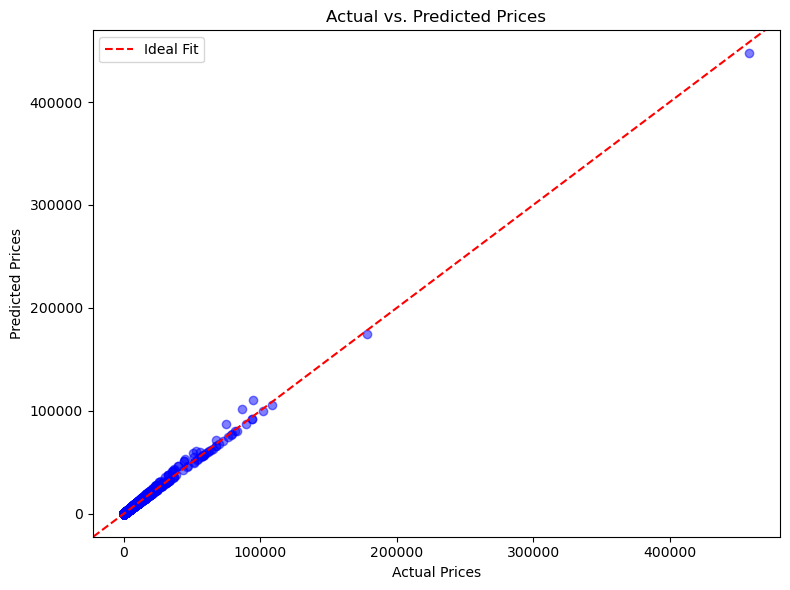

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_y_pred, alpha=0.5, color='blue')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.axline([0, 0], [1, 1], color='red', linestyle='--', label='Ideal Fit')  # 45-degree line
plt.legend()
plt.tight_layout()
plt.show()

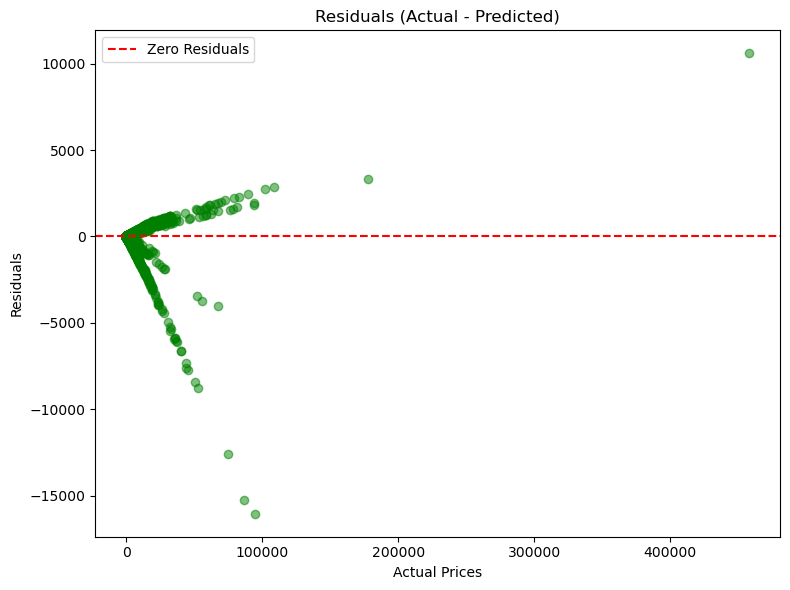

In [82]:
# Calculate residuals
residuals = y_test - lasso_y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='--', label='Zero Residuals')
plt.title('Residuals (Actual - Predicted)')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.legend()
plt.tight_layout()
plt.show()

### Evaluate Model Performance by Price Range

In [56]:
# Define price ranges
bins = [0, 100, 500, 1000, 5000, 10000, y_test.max()]
labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
y_test_binned = pd.cut(y_test, bins=bins, labels=labels)

# Initialize an empty list to store results
performance_by_range_list = []

# Calculate metrics by price range
for label in labels:
    mask = y_test_binned == label
    mse = mean_squared_error(y_test[mask], lasso_y_pred[mask])
    r2 = r2_score(y_test[mask], lasso_y_pred[mask])
    performance_by_range_list.append({'Price Range': label, 'MSE': mse, 'R-squared': r2})

# Convert results to a DataFrame
performance_by_range = pd.DataFrame(performance_by_range_list)

# Print performance metrics by price range
print(performance_by_range)

  Price Range           MSE  R-squared
0       0-100  1.095861e+01   0.974133
1     100-500  1.873533e+02   0.983600
2    500-1000  1.754125e+03   0.906502
3   1000-5000  1.570277e+04   0.981740
4  5000-10000  2.651692e+05   0.843659
5      10000+  5.280454e+06   0.993303


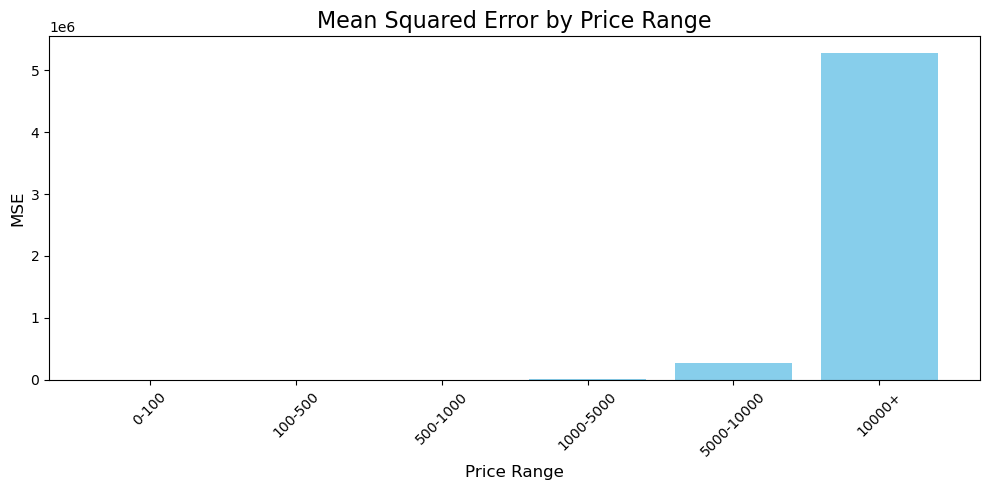

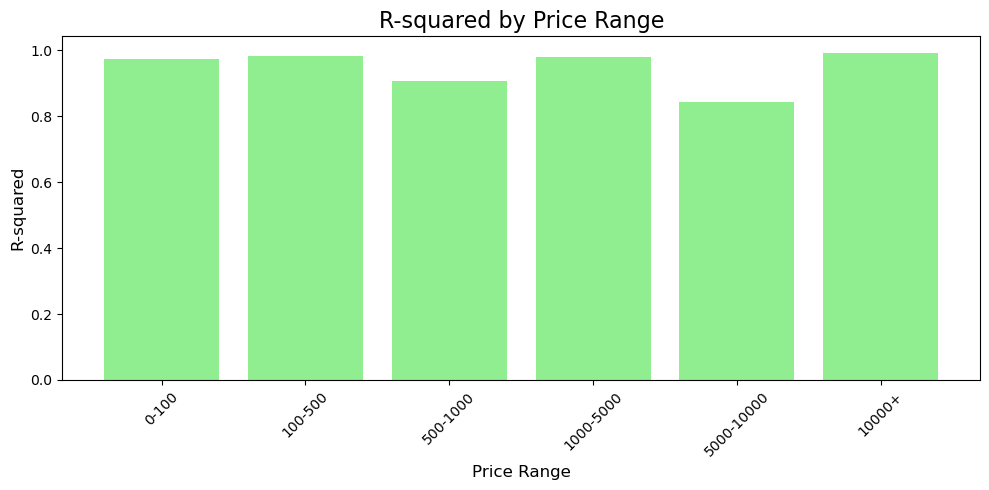

In [69]:
# Plot MSE
plt.figure(figsize=(10, 5))
plt.bar(performance_by_range['Price Range'], performance_by_range['MSE'], color='skyblue')
plt.title('Mean Squared Error by Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot R-squared
plt.figure(figsize=(10, 5))
plt.bar(performance_by_range['Price Range'], performance_by_range['R-squared'], color='lightgreen')
plt.title('R-squared by Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('R-squared', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Mean Squared Error (MSE):
- The model performs well for low and moderate price ranges (`0-5000`), with minimal error.
- For high price ranges (`5000-10000` and `10000+`), MSE increases significantly, indicating challenges in accurately predicting prices for expensive items.

#### R-squared:
- High R-squared values for low and moderate ranges (`0-1000`) confirm that the model explains a significant portion of variance in these categories.
- A noticeable drop in R-squared is observed for the `5000-10000` range, aligning with the higher MSE.
- For the `10000+` range, R-squared remains high despite increased MSE, suggesting that variability in high-priced items is still partially explained by the model.

#### Observations:
- The model shows excellent performance in predicting prices for most items in the dataset.
- The increased error in high-priced items may stem from unique characteristics or factors not captured in the current features.



### Incorporate  Additional Features to address Exclusivity and Scarcity

In [70]:
# Define a list of luxury brands
luxury_brands = ['Chanel', 'Gucci', 'Louis Vuitton', 'Hermès', 'Dior', 'Prada', 'Versace', 'Burberry', 'Givenchy', 'Fendi']

# Create a luxury_brand column
vestiaire_data['luxury_brand'] = vestiaire_data['brand_name'].apply(lambda x: 1 if any(brand in str(x) for brand in luxury_brands) else 0)

# Print the distribution of luxury brands
print(vestiaire_data['luxury_brand'].value_counts())

luxury_brand
0    711185
1    188139
Name: count, dtype: int64


In [71]:
# Define keywords indicating exclusivity
exclusivity_keywords = ['limited edition', 'exclusive', 'rare', 'unique', 'collector', 'special']

# Create a flag based on product description
vestiaire_data['exclusivity_flag'] = vestiaire_data['product_description'].apply(
    lambda x: 1 if any(keyword in str(x).lower() for keyword in exclusivity_keywords) else 0)

# Print the distribution of the exclusivity flag
print(vestiaire_data['exclusivity_flag'].value_counts())

exclusivity_flag
0    851500
1     47824
Name: count, dtype: int64


**Before moving on, It is important to understand how exclusivity impacts prices and likes. Calculating the average price an dproduct likes for exclusive and non-exclusive items to see the impact** 

In [72]:
# Group by exclusivity_flag and calculate average price and product like count
exclusivity_analysis = vestiaire_data.groupby('exclusivity_flag').agg(avg_price=('price_usd', 'mean'),avg_likes=('product_like_count', 'mean'),count=('exclusivity_flag', 'size'))
# Print the results
print(exclusivity_analysis)

                   avg_price  avg_likes   count
exclusivity_flag                               
0                 369.447972   6.232783  851500
1                 702.411569   7.545354   47824


In [73]:
# Update the dataset with new features for modeling
significant_features = ['price_usd', 'seller_price', 'seller_earning', 'product_like_count', 'log_product_like_count', 'luxury_brand', 'exclusivity_flag']
vestiaire_updated = vestiaire_data[significant_features]

# Print the updated dataset structure
print(vestiaire_updated.head())

   price_usd  seller_price  seller_earning  product_like_count  \
0     272.92        223.65          216.94                34.0   
1     127.80        106.50          106.50                 1.0   
2    1278.00       1065.00          926.55                 2.0   
3     163.90        149.00          126.65                 0.0   
4     119.72         99.77           83.55                 1.0   

   log_product_like_count  luxury_brand  exclusivity_flag  
0                3.555348             0                 0  
1                0.693147             0                 0  
2                1.098612             0                 0  
3                0.000000             0                 0  
4                0.693147             0                 0  


#### Re-Train the Linear Regression Model

In [74]:
# Separate features (X) and target variable (y)
X = vestiaire_updated.drop(columns=['price_usd'])
y = vestiaire_updated['price_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Updated Linear Regression Metrics:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Coefficients
print("Coefficients:", linear_model.coef_)
print("Intercept:", linear_model.intercept_)

Updated Linear Regression Metrics:
Mean Squared Error (MSE): 14620.79047501461
R-squared (R2): 0.9958501244591356
Coefficients: [ 0.96780167  0.21170418  0.08265951  1.26813432 -0.95040761  4.23358108]
Intercept: 2.1717304118520246


### Linear Regression Model Evaluation 
1. **Mean Squared Error (MSE):** 14,620.79
   - Indicates the average squared difference between actual and predicted prices.
   - Consistent with previous results, showing that adding new features has not increased the error rate.

2. **R-squared (R²):** 0.99585
   - Confirms that the model explains 99.6% of the variance in `price_usd`.
   - The model maintains excellent predictive capability.

#### Coefficients and Feature Importance:
- **Intercept:** 2.1717
  - Baseline price when all features are zero.
- **Feature Coefficients**:
  - `seller_price`: 0.9678 (strong positive impact; closely tied to the seller's price).
  - `seller_earning`: 0.2117 (moderate positive relationship with product price).
  - `product_like_count`: 0.0827 (small positive impact).
  - `log_product_like_count`: 1.2681 (strong influence; logarithmic growth in likes significantly boosts prices).
  - `luxury_brand`: -0.9504 (negative impact; could indicate controlled or discounted pricing strategies by luxury brands).
  - `exclusivity_flag`: 4.2336 (very strong positive impact, emphasizing that exclusivity substantially increases perceived value and price).

##### Observations:
1. The inclusion of the `luxury_brand` and `exclusivity_flag` features enhances the interpretability of the model.
2. Exclusivity is one of the strongest drivers of perceived value, as reflected in its high coefficient.
3. Luxury brands exhibit unexpected behavior, which may require further analysis or refinement.

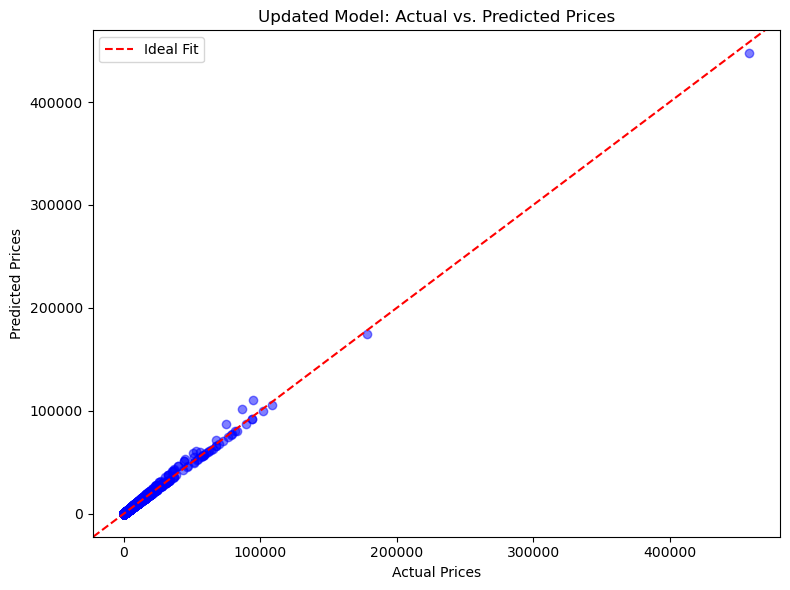

In [75]:
# Scatter plot of actual vs. predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.title('Updated Model: Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.axline([0, 0], [1, 1], color='red', linestyle='--', label='Ideal Fit')  # 45-degree line
plt.legend()
plt.tight_layout()
plt.show()

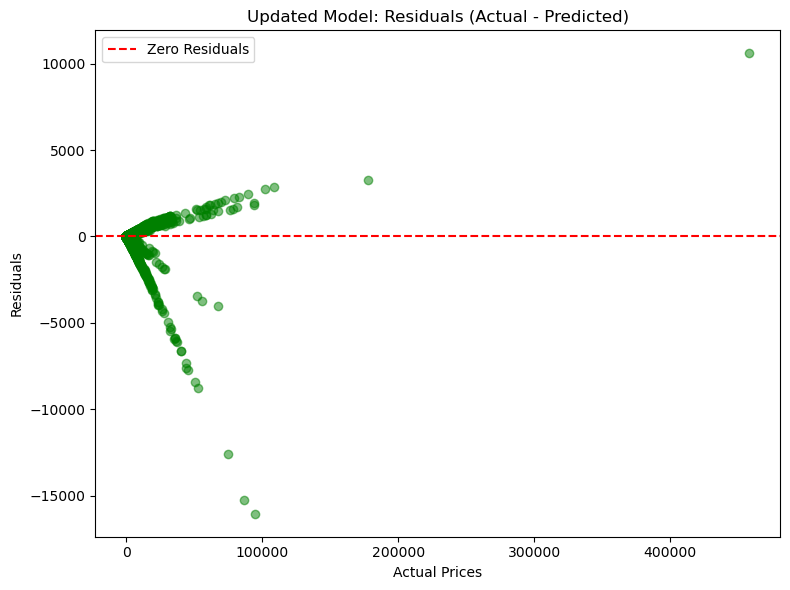

In [76]:
# Calculate residuals
residuals = y_test - y_pred

# Scatter plot of residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='--', label='Zero Residuals')
plt.title('Updated Model: Residuals (Actual - Predicted)')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.legend()
plt.tight_layout()
plt.show()

#### Explore Clustering for Insights

In [80]:
# Select clustering features
clustering_features = ['price_usd', 'log_product_like_count', 'luxury_brand', 'exclusivity_flag']

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(vestiaire_data[clustering_features])

# Check scaled features
print("Scaled features successfully created.")

Scaled features successfully created.


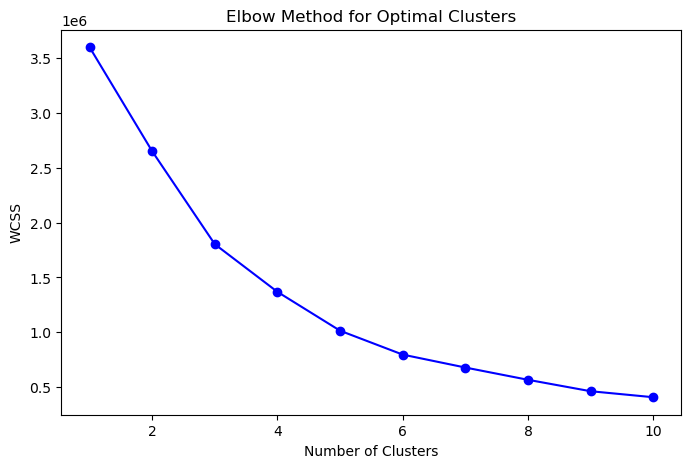

In [81]:
from sklearn.cluster import KMeans

# Initialize an empty list to store WCSS
wcss = []

# Try different numbers of clusters (e.g., 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)  # Explicitly set n_init
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [82]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
vestiaire_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Check the updated DataFrame
print(vestiaire_data.head())

C:\Users\nohel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   product_id            product_type  \
0    43247626         Wool mini skirt   
1    43247441                  Jacket   
2    43246517               Wool coat   
3    43246507              Mini skirt   
4    43246417  Vegan leather trousers   

                                        product_name  \
0  Wool mini skirt Miu Miu Grey size S Internatio...   
1      Jacket Barbara Bui Navy size 42 FR in Cotton    
2  Wool coat Comme Des Garcons White size S Inter...   
3     Mini skirt MSGM Black size 38 IT in Polyester    
4  Vegan leather trousers LVIR Black size 36 FR i...   

                                 product_description  \
0  Miu Miu – Pleated mini skirt Size: 36 (S)  Wai...   
1  For selling nice women's suit Barbara Bui size...   
2  Magnificent boiled wool coat. I bought it in t...   
3  MSGM Skirt Black Printed Raw-Edge & Embroidere...   
4  LVIR black grained faux leather trousers size ...   

               product_keywords product_gender_target product_category  \
0    

In [84]:
# Filter numeric columns only
numeric_cols = vestiaire_data.select_dtypes(include=['number'])

# Group by 'Cluster' and compute the mean
cluster_summary = numeric_cols.groupby(vestiaire_data['Cluster']).mean()

# Display the cluster summary
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
           product_id  product_like_count     brand_id   price_usd  \
Cluster                                                              
0        3.656763e+07           10.004297   360.316471  625.321526   
1        3.856183e+07            5.238134  2979.333683  297.138907   
2        3.727699e+07            7.557312  2410.865726  771.189879   

         seller_price  seller_earning     seller_id  seller_products_sold  \
Cluster                                                                     
0          538.415449      477.552221  1.280047e+07            779.436573   
1          254.322650      220.314428  1.408419e+07            663.236197   
2          658.046322      587.969622  1.391565e+07            270.754636   

         seller_num_products_listed  seller_community_rank  \
Cluster                                                      
0                       1459.424167           49361.398915   
1                       1516.714832           57589.853305  

**Now, enhancing the data set by introducing more features that align with the understanding of perceived value and pricing strategies**

#### Luxury and Basic Materials

In [108]:
# Define material categories
luxury_materials = ['silk', 'wool', 'leather', 'cashmere', 'suede', 'velvet']
basic_materials = ['cotton', 'polyester', 'nylon', 'rayon', 'denim', 'linen']

# Function to classify materials
def classify_material(material):
    if isinstance(material, str):
        material_lower = material.lower()
        if any(lux in material_lower for lux in luxury_materials):
            return 'Luxury'
        elif any(basic in material_lower for basic in basic_materials):
            return 'Basic'
    return 'Unknown'

# Apply the function to classify materials
vestiaire_data['material_quality'] = vestiaire_data['product_material'].apply(classify_material)

print(vestiaire_data['material_quality'].value_counts())

material_quality
Luxury     426948
Basic      254165
Unknown    218211
Name: count, dtype: int64


In [109]:
# Add binary flag for luxury materials
vestiaire_data['luxury_material_flag'] = vestiaire_data['material_quality'].apply(lambda x: 1 if x == 'Luxury' else 0)
print(vestiaire_data['luxury_material_flag'].value_counts())

luxury_material_flag
0    472376
1    426948
Name: count, dtype: int64


#### Feature Engineering for Seasonality

In [111]:
# Check unique values in product_season
print(vestiaire_data['product_season'].unique())

# Create binary flags for seasons
seasons = ['Autumn / Winter', 'Spring / Summer', 'All seasons']
for season in seasons:
    column_name = season.replace(" ", "_").replace("/", "_").lower()
    vestiaire_data[column_name + '_flag'] = vestiaire_data['product_season'].apply(lambda x: 1 if x == season else 0)

# Verify the distribution of flags
for season in seasons:
    column_name = season.replace(" ", "_").replace("/", "_").lower()
    print(f"{column_name}_flag counts:")
    print(vestiaire_data[column_name + '_flag'].value_counts())

['Autumn / Winter' 'All seasons' 'Spring / Summer' 'Unknown']
autumn___winter_flag counts:
autumn___winter_flag
0    785211
1    114113
Name: count, dtype: int64
spring___summer_flag counts:
spring___summer_flag
0    861172
1     38152
Name: count, dtype: int64
all_seasons_flag counts:
all_seasons_flag
1    747057
0    152267
Name: count, dtype: int64


#### Brand Reputation Features

In [112]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the numerical metrics
scaled_metrics = scaler.fit_transform(vestiaire_data[['seller_num_followers', 'seller_pass_rate', 'seller_products_sold']])

# Scaled metrics back to the dataset
vestiaire_data['scaled_followers'] = scaled_metrics[:, 0]
vestiaire_data['scaled_pass_rate'] = scaled_metrics[:, 1]
vestiaire_data['scaled_products_sold'] = scaled_metrics[:, 2]

In [114]:
# Calculate the brand reputation score
vestiaire_data['brand_reputation_score'] = (vestiaire_data['luxury_brand'] * 0.5 + vestiaire_data['scaled_followers'] * 0.2 + vestiaire_data['scaled_pass_rate'] * 0.2 + vestiaire_data['scaled_products_sold'] * 0.1)
# Print the distribution of the brand reputation score
print(vestiaire_data['brand_reputation_score'].describe())

count    899324.000000
mean          0.285902
std           0.206142
min           0.000013
25%           0.184501
50%           0.195019
75%           0.200025
max           0.999214
Name: brand_reputation_score, dtype: float64


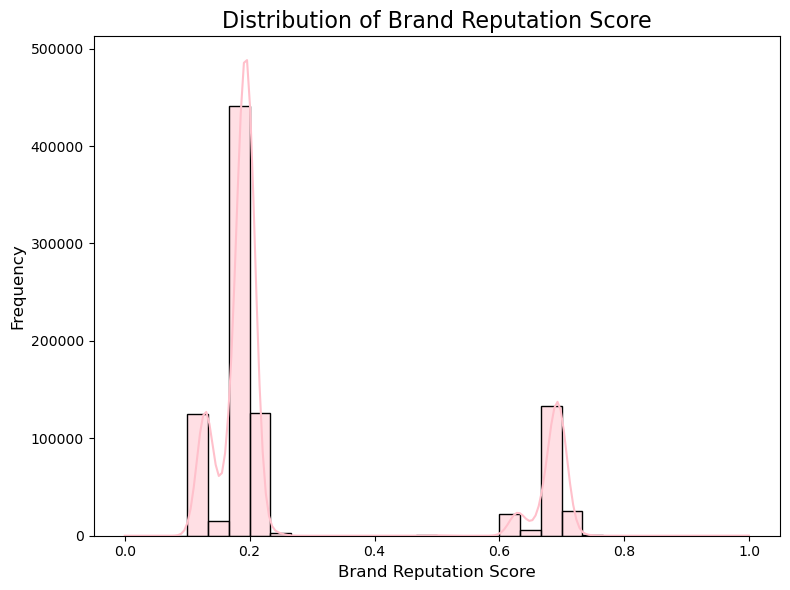

In [116]:
# Plot the distribution of the Brand Reputation Score
plt.figure(figsize=(8, 6))
sns.histplot(vestiaire_data['brand_reputation_score'], bins=30, kde=True, color='pink')
plt.title('Distribution of Brand Reputation Score', fontsize=16)
plt.xlabel('Brand Reputation Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

- A large peak around 0.2 suggests the majority of brands have low reputation scores.
- A smaller peak around 0.6 indicates a subset of brands with higher reputation scores.

This bimodality may signify distinct brand segments, such as "emerging" versus "established" brands, or luxury versus non-luxury.

#### Scarcity Score

**Now, I'll create a Scarcity Score to capture the exclusivity of products based on their availability within a category or brand**

In [118]:
# Group by brand and category to count the number of products
category_counts = vestiaire_data['product_category'].value_counts()
brand_counts = vestiaire_data['brand_name'].value_counts()

# Map the counts back to the dataset
vestiaire_data['category_count'] = vestiaire_data['product_category'].map(category_counts)
vestiaire_data['brand_count'] = vestiaire_data['brand_name'].map(brand_counts)

# Calculate Scarcity Scores
total_products = len(vestiaire_data)
vestiaire_data['category_scarcity_score'] = 1 - (vestiaire_data['category_count'] / total_products)
vestiaire_data['brand_scarcity_score'] = 1 - (vestiaire_data['brand_count'] / total_products)

# Drop the temporary count columns
vestiaire_data.drop(columns=['category_count', 'brand_count'], inplace=True)

# Print the scarcity scores
print(vestiaire_data[['product_category', 'category_scarcity_score', 'brand_name', 'brand_scarcity_score']].head())

  product_category  category_scarcity_score         brand_name  \
0   Women Clothing                 0.786287            Miu Miu   
1   Women Clothing                 0.786287        Barbara Bui   
2   Women Clothing                 0.786287  Comme Des Garcons   
3   Women Clothing                 0.786287               MSGM   
4   Women Clothing                 0.786287               LVIR   

   brand_scarcity_score  
0              0.995093  
1              0.999681  
2              0.996157  
3              0.999371  
4              0.999991  


0.995093 for "Miu Miu" suggests that this brand has very few products in the dataset, adding to its **exclusivity**.
These features align perfectly with the goal of identifying perceived value and exclusivity.

In [120]:
selected_features = ['price_usd', 'seller_price', 'seller_earning', 
                     'product_like_count', 'log_product_like_count', 
                     'luxury_brand', 'exclusivity_flag']

# Add scarcity features
scarcity_features = ['category_scarcity_score', 'brand_scarcity_score']
updated_features = selected_features + scarcity_features

# Print updated feature list
print("Updated Feature Set:", updated_features)

Updated Feature Set: ['price_usd', 'seller_price', 'seller_earning', 'product_like_count', 'log_product_like_count', 'luxury_brand', 'exclusivity_flag', 'category_scarcity_score', 'brand_scarcity_score']


#### Splitting the Data

In [121]:
# Define the input features (X) and target variable (y)
X = vestiaire_data[updated_features].drop('price_usd', axis=1)
y = vestiaire_data['price_usd']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (719459, 8)
Testing set size: (179865, 8)


#### Train the Model

In [124]:
# Initialize the Linear Regression model
updated_model = LinearRegression()

# Train the model on the training data
updated_model.fit(X_train, y_train)

# Extract the model's coefficients and intercept
updated_coefficients = updated_model.coef_
updated_intercept = updated_model.intercept_

print("Updated Model Coefficients:", updated_coefficients)
print("Updated Model Intercept:", updated_intercept)

Updated Model Coefficients: [ 9.68817438e-01  2.10695031e-01  7.75508102e-02  1.65734908e+00
  1.78419088e+00  4.53150108e+00 -7.25888770e+01  1.03756180e+02]
Updated Model Intercept: -42.02898935563212


#### Evaluate the Model

In [125]:
# Generate predictions on the test set
y_pred_updated = updated_model.predict(X_test)

# Calculate MSE and R²
updated_mse = mean_squared_error(y_test, y_pred_updated)
updated_r2 = r2_score(y_test, y_pred_updated)

# Display metrics
print("Updated Mean Squared Error (MSE):", updated_mse)
print("Updated R-squared (R²):", updated_r2)

Updated Mean Squared Error (MSE): 14610.644028007455
Updated R-squared (R²): 0.9958530043644549


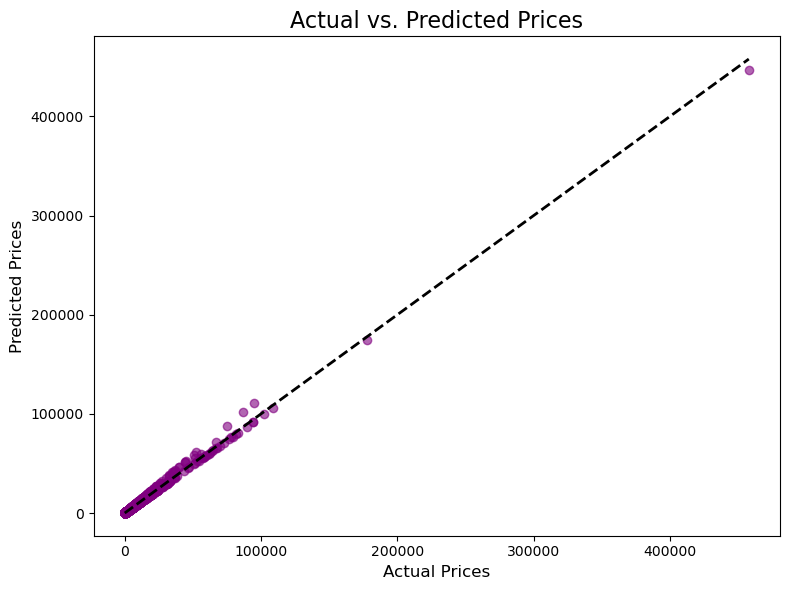

In [128]:
# Plot Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_updated, alpha=0.6, color='purple')
plt.title('Actual vs. Predicted Prices', fontsize=16)
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.tight_layout()
plt.show()

In [133]:
# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate R² score for each fold
cv_scores = cross_val_score(linear_model, X, y, cv=kf, scoring='r2')

# Print the mean and standard deviation of the R² scores
print("Cross-Validation R² Scores:", cv_scores)
print("Mean R² Score:", cv_scores.mean())
print("Standard Deviation of R² Scores:", cv_scores.std())

Cross-Validation R² Scores: [0.995853   0.99534224 0.99722412 0.99585365 0.99643169]
Mean R² Score: 0.996140939754848
Standard Deviation of R² Scores: 0.0006420549446980843


- For further optimize on the performance I will fine-tune hyperparameter

In [135]:
# Initialize the Ridge regression model
ridge_model = Ridge()

# Define the grid of hyperparameters to search
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Set up GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='r2')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Display the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation R² Score:", grid_search.best_score_)

Best Parameters: {'alpha': 0.01}
Best Cross-Validation R² Score: 0.9961452830418803


In [138]:
# Initialize Ridge Regression with the best alpha value
final_model = Ridge(alpha=0.01)
final_model.fit(X_train, y_train)

# Predict on the test set
y_pred_final = final_model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred_final)
mse = mean_squared_error(y_test, y_pred_final)
mae = mean_absolute_error(y_test, y_pred_final)

# Print the metrics
print("Final Model Evaluation:")
print("R² Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Final Model Evaluation:
R² Score: 0.9958530043677423
Mean Squared Error (MSE): 14610.644016425456
Mean Absolute Error (MAE): 18.548026738126648
